# PROJET NLP : IMDB Review Classification 



# Part I: Preprocessing for Sentiment Analysis

#  I - introduction

The Internet Movie Database (IMDb) Review Sentiment Analysis Project is a data science endeavor that focuses on the analysis of movie reviews to determine the sentiment expressed by viewers. IMDb is one of the most popular and comprehensive databases for movies, TV shows, and entertainment-related content, containing a vast collection of user-generated reviews and ratings. This project aims to harness the power of natural language processing (NLP) and machine learning to gain insights into the sentiments of viewers.

### Imports

In [3]:
import pandas as pd
import nltk
import numpy as np
import seaborn as sns
from nltk.corpus import stopwords
import string
import matplotlib.pyplot as plt
import random          
import re

In [4]:
df=pd.read_csv('IMDB Dataset.csv')

df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [5]:
len(df),df.index.shape[-1]

(50000, 50000)

In [6]:
print("The Shape of the Dataset".format(),df.shape)

The Shape of the Dataset (50000, 2)


# 1- Basic Operations on Text Data and EDA

In [7]:
df.groupby("sentiment").describe()

review                                                            \
           count unique                                                top   
sentiment                                                                    
negative   25000  24698  This show comes up with interesting locations ...   
positive   25000  24884  Loved today's show!!! It was a variety and not...   

                
          freq  
sentiment       
negative     3  
positive     5

In [8]:
#Removing duplicates to avoid overfitting
df.drop_duplicates(inplace=True)

In [9]:
good_reviews=df[df['sentiment']=='positive']['review']
bad_reviews=df[df['sentiment']=='negative']['review']
print("First 10 samples of good reviews\n".format(),good_reviews[:10])
print("First 10 samples of bad reviews\n".format(),bad_reviews[:10])

First 10 samples of good reviews
 0     One of the other reviewers has mentioned that ...
1     A wonderful little production. <br /><br />The...
2     I thought this was a wonderful way to spend ti...
4     Petter Mattei's "Love in the Time of Money" is...
5     Probably my all-time favorite movie, a story o...
6     I sure would like to see a resurrection of a u...
9     If you like original gut wrenching laughter yo...
14    This a fantastic movie of three prisoners who ...
16    Some films just simply should not be remade. T...
18    I remember this film,it was the first film i h...
Name: review, dtype: object
First 10 samples of bad reviews
 3     Basically there's a family where a little boy ...
7     This show was an amazing, fresh & innovative i...
8     Encouraged by the positive comments about this...
10    Phil the Alien is one of those quirky films wh...
11    I saw this movie when I was about 12 when it c...
12    So im not a big fan of Boll's work but then ag...
13    The

Total Counts of both sets positive    24884
negative    24698
Name: sentiment, dtype: int64


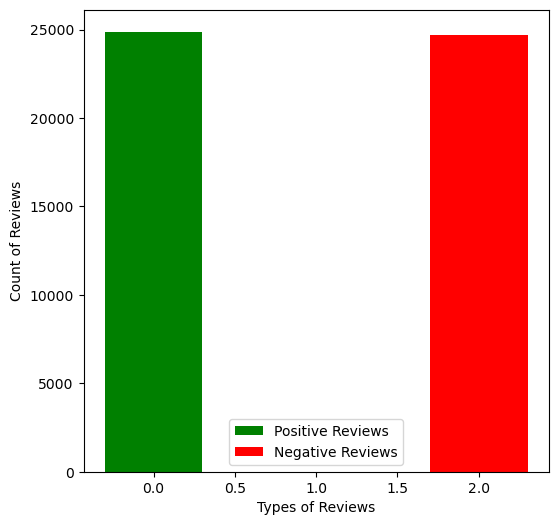

In [10]:
count=df['sentiment'].value_counts()
print('Total Counts of both sets'.format(),count)

print("==============")
def plot_counts(count_good,count_bad):
    plt.rcParams['figure.figsize']=(6,6)
    plt.bar(0,count_good,width=0.6,label='Positive Reviews',color='Green')
    plt.legend()
    plt.bar(2,count_bad,width=0.6,label='Negative Reviews',color='Red')
    plt.legend()
    plt.ylabel('Count of Reviews')
    plt.xlabel('Types of Reviews')
    plt.show()
    
count_good=df[df['sentiment']=='positive']
count_bad=df[df['sentiment']=='negative']
plot_counts(len(count_good),len(count_bad))

Positive Review Words:0        307
1        162
2        166
4        230
5        119
        ... 
49983    133
49985    216
49989    173
49992    170
49995    194
Name: review, Length: 24884, dtype: int64
Negative Review Words:3        138
7        174
8        130
10        96
11       180
        ... 
49994    134
49996    112
49997    230
49998    212
49999    129
Name: review, Length: 24698, dtype: int64


C:\Users\MSI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\MSI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


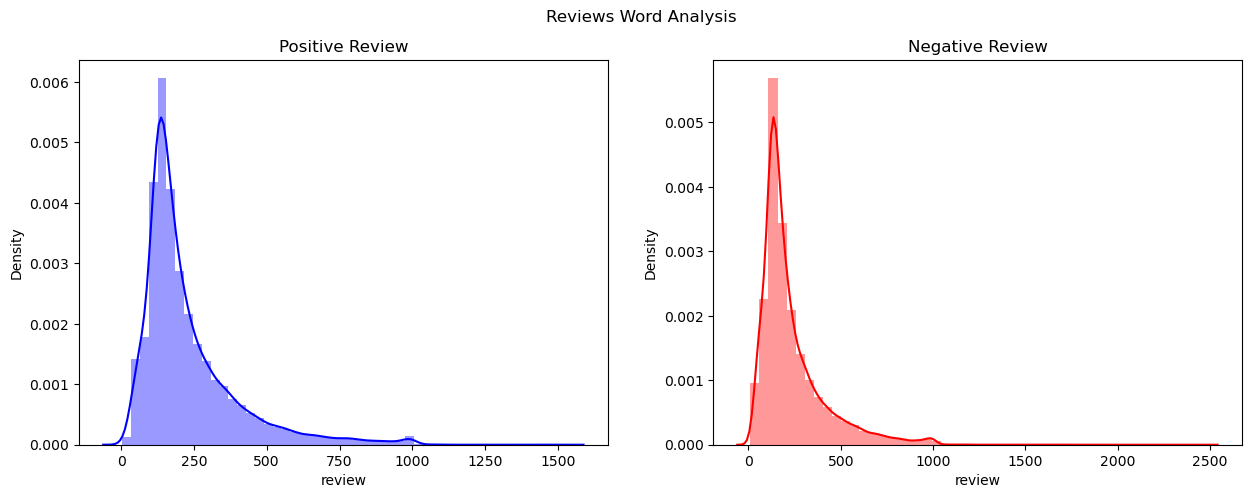

In [11]:
#Analyse the count of words in each segment- both positive and negative reviews
def cal_len(data):
    return len(data)

def plot_count(count_ones,count_zeros,title_1,title_2,subtitle):
    fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
    sns.distplot(count_zeros,ax=ax1,color='Blue')
    ax1.set_title(title_1)
    sns.distplot(count_ones,ax=ax2,color='Red')
    ax2.set_title(title_2)
    fig.suptitle(subtitle)
    plt.show()    




count_good_words=count_good['review'].str.split().apply(lambda z:cal_len(z))
count_bad_words=count_bad['review'].str.split().apply(lambda z:cal_len(z))
print("Positive Review Words:" + str(count_good_words))
print("Negative Review Words:" + str(count_bad_words))
plot_count(count_good_words,count_bad_words,"Positive Review","Negative Review","Reviews Word Analysis")

### Word Cloud

In [18]:
# if not already done download the stopwords from NLTK
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MSI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

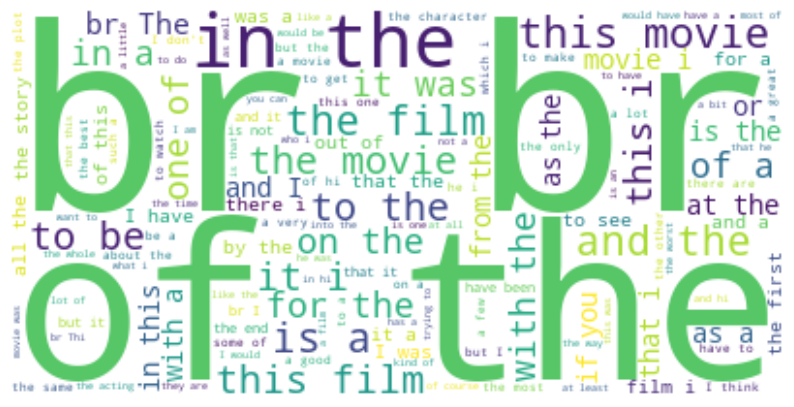

In [12]:
from wordcloud import WordCloud
from nltk.corpus import stopwords

def display_cloud(data, color):
    plt.subplots(figsize=(10, 10))
    wc = WordCloud(stopwords=set(), background_color="white", contour_width=2, contour_color=color,
                   max_words=2000, max_font_size=256,
                   random_state=42)
    wc.generate(' '.join(data))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis('off')
    plt.show()


display_cloud(df['review'], 'red')

<AxesSubplot:>

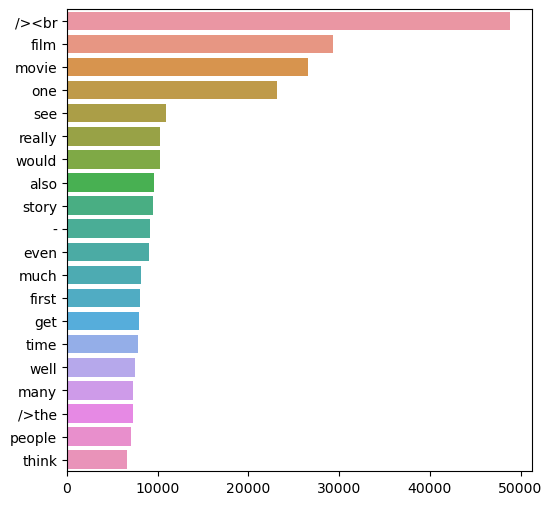

In [13]:
from collections import Counter
stops = set(stopwords.words('english'))

exceptions = {'love', 'hate', 'sentimental', 'joy', 'exciting', 'passionate', 'like', 'good', 'great', 'best'}
stops = {word for word in stops if word not in exceptions}
    
def create_corpus(sentiment):
    corpus = []

    for sentence in df[df['sentiment'] == sentiment]['review']:
        words = sentence.split()
        words = [word.lower() for word in words if word.lower() not in stops]
        corpus.extend(words)

    return corpus

corpus = create_corpus('positive')
counter = Counter(corpus)

for exception_word in exceptions:
    del counter[exception_word]

most = counter.most_common(20)  
x = []
y = []

for word, count in most:
    x.append(word)
    y.append(count)

sns.barplot(x=y, y=x)


#### Inference From Analysis I
The following can be inferred from the data:

The dataset is balanced.

The dataset contains equal number of semantics for reviews of both polarity.

The dataset contains redundant words and html syntaxes.

Punctuations/stopwords are present in a equal distribution in the dataset.

This tells us that we have to do lots of cleaning 

### Visualization of Raw data

In [14]:
positive_reviews = df[df['sentiment'] == 'positive']['review'].tolist()
negative_reviews = df[df['sentiment'] == 'negative']['review'].tolist()


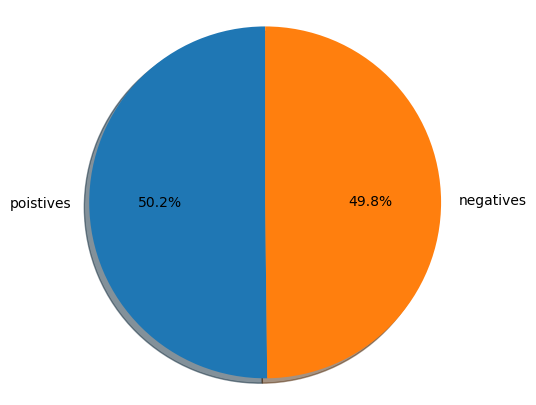

In [15]:
fig = plt.figure(figsize=(5, 5))
labels = 'poistives','negatives'

sizes = [len(positive_reviews),len(negative_reviews)]

plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

plt.axis('equal')  

# Display the chart
plt.show()

### exemple of raw text 

In [16]:
# print positive in greeen('\033[92m')
print('\033[92m' + random.choice(positive_reviews))

# Print a random negative review in red ('\033[91m')
print('\033[91m' + random.choice(negative_reviews))

Considering it's basically low-budget cast, this is a surprisingly good flick about the life and death of rock pioneer Buddy Holly. Gary Busey stars as Holly, who was one of the first to use an electric guitar for pretty much all his music. Backed up by his Crickets, Holly had a string of hits and became a bona fide star before his death in a plane crash along with Richie Valens and The Big Bopper. The film follows his rise to stardom, marriage to his sweetheart and eventual death. I like this film and believe that you will too. Charles Martin Smith also does a great job in this film.
This is another one of those fundamentalist Christian movies that hit you over the head with religion like a sledgehammer. You know you are in trouble when the setup of the story is completely ridiculous. Three men are flying to Mexico to deliver Bibles. This makes no sense since the church is Protestant and most Mexicans are Catholic. Protestant and Catholic bibles are not the same. The Catholic bible ha

### Preprocess raw text for Sentiment analysis of movie reviews

In [17]:
import re                                  # library for regular expression operations
import string                              # for string operations

from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming
from nltk.tokenize import TweetTokenizer   # module for tokenizing strings

We're going to use the important of preprocessing techniques such that:
* Tokenizing the string
* Lowercasing
* Removing stop words and punctuation
* Stemming



### Remove hyperlinks,  hashtags marks and  HTML styles

In [19]:
def clean_text(text):
    # Remove hyperlinks (https:// or http:// followed by non-whitespace characters)
    text = re.sub(r'https?://[^\s]+', '', text)

    # Remove hashtags (remove the '#' symbol from words)
    text = re.sub(r'#', '', text)

    # Remove old style retweet text (e.g., "RT" at the beginning of the text)
    text = re.sub(r'^RT[\s]+', '', text)

    # Remove HTML-style tags (e.g., '<br />')
    text = re.sub(r'<.*?>', '', text)

    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    # Convert to lowercase
    text = text.lower()
    return text
df['cleaned_review'] = df['review'].apply(clean_text)

In [20]:
positive_reviews = df[df['sentiment'] == 'positive']['review'].tolist()
negative_reviews = df[df['sentiment'] == 'negative']['review'].tolist()


# Apply the cleaning function to positive and negative reviews
cleaned_positive_reviews = [clean_text(review) for review in positive_reviews]
cleaned_negative_reviews = [clean_text(review) for review in negative_reviews]

# Print a cleaned positive review and a cleaned negative review
print('\033[92m' + cleaned_positive_reviews[0])  # Print a cleaned positive review
print('\033[94m' + cleaned_negative_reviews[0])  # Print a cleaned negative review



one of the other reviewers has mentioned that after watching just 1 oz episode you'll be hooked. they are right, as this is exactly what happened with me.the first thing that struck me about oz was its brutality and unflinching scenes of violence, which set in right from the word go. trust me, this is not a show for the faint hearted or timid. this show pulls no punches with regards to drugs, sex or violence. its is hardcore, in the classic use of the word.it is called oz as that is the nickname given to the oswald maximum security state penitentary. it focuses mainly on emerald city, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. em city is home to many..aryans, muslims, gangstas, latinos, christians, italians, irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.i would say the main appeal of the show is due to the fact that it goes where other shows wou

### Tokenize the string

split the strings into individual words without blanks or tabs. In this same step, we will also convert each word in the string to lower case. 

In [21]:
from nltk.tokenize import TweetTokenizer

# Instantiate the tokenizer class
tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)

# Convert text to lowercase (preserving case=False),  Reduce repeated characters (e.g., "helloooo" becomes "hello") (reduce_len=True)

tokenized_positive_reviews = [tokenizer.tokenize(review) for review in cleaned_positive_reviews]

tokenized_negative_reviews = [tokenizer.tokenize(review) for review in cleaned_negative_reviews]

print('\033[92m' + 'Tokenized Positive Review:')
print('\033[94m')
print(tokenized_positive_reviews[0])  # Print tokenized positive review

print('\033[92m' + 'Tokenized Negative Review:')
print('\033[94m')
print(tokenized_negative_reviews[0])  # Print tokenized negative review

Tokenized Positive Review:

['one', 'of', 'the', 'other', 'reviewers', 'has', 'mentioned', 'that', 'after', 'watching', 'just', '1', 'oz', 'episode', "you'll", 'be', 'hooked', '.', 'they', 'are', 'right', ',', 'as', 'this', 'is', 'exactly', 'what', 'happened', 'with', 'me.the', 'first', 'thing', 'that', 'struck', 'me', 'about', 'oz', 'was', 'its', 'brutality', 'and', 'unflinching', 'scenes', 'of', 'violence', ',', 'which', 'set', 'in', 'right', 'from', 'the', 'word', 'go', '.', 'trust', 'me', ',', 'this', 'is', 'not', 'a', 'show', 'for', 'the', 'faint', 'hearted', 'or', 'timid', '.', 'this', 'show', 'pulls', 'no', 'punches', 'with', 'regards', 'to', 'drugs', ',', 'sex', 'or', 'violence', '.', 'its', 'is', 'hardcore', ',', 'in', 'the', 'classic', 'use', 'of', 'the', 'word.it', 'is', 'called', 'oz', 'as', 'that', 'is', 'the', 'nickname', 'given', 'to', 'the', 'oswald', 'maximum', 'security', 'state', 'penitentary', '.', 'it', 'focuses', 'mainly', 'on', 'emerald', 'city', ',', 'an', 'expe

### Remove stop words and punctuations

The next step is to remove stop words and punctuation. Stop words are words that don't add significant meaning to the text. You'll see the list provided by NLTK when you run the cells below.

In [22]:
stopwords_english = stopwords.words('english') 

print('Stop words\n')
print(stopwords_english)


print('\nPunctuation\n') 
print(string.punctuation)

Stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

In [23]:
cleaned_positive_reviews = []
cleaned_negative_reviews = []

for tokens in tokenized_positive_reviews:
    cleaned_tokens = [word for word in tokens if word not in string.punctuation and word not in stopwords_english]
    cleaned_positive_reviews.append(cleaned_tokens)

for tokens in tokenized_negative_reviews:
    cleaned_tokens = [word for word in tokens if word not in string.punctuation and word not in stopwords_english]
    cleaned_negative_reviews.append(cleaned_tokens)

print('\033[92m' + 'Cleaned Positive Review:')
print('\033[94m')
print(cleaned_positive_reviews[0])  # Print cleaned positive review

print('\033[92m' + 'Cleaned Negative Review:')
print('\033[94m')
print(cleaned_negative_reviews[0])  # Print cleaned negative review

Cleaned Positive Review:

['one', 'reviewers', 'mentioned', 'watching', '1', 'oz', 'episode', 'hooked', 'right', 'exactly', 'happened', 'me.the', 'first', 'thing', 'struck', 'oz', 'brutality', 'unflinching', 'scenes', 'violence', 'set', 'right', 'word', 'go', 'trust', 'show', 'faint', 'hearted', 'timid', 'show', 'pulls', 'punches', 'regards', 'drugs', 'sex', 'violence', 'hardcore', 'classic', 'use', 'word.it', 'called', 'oz', 'nickname', 'given', 'oswald', 'maximum', 'security', 'state', 'penitentary', 'focuses', 'mainly', 'emerald', 'city', 'experimental', 'section', 'prison', 'cells', 'glass', 'fronts', 'face', 'inwards', 'privacy', 'high', 'agenda', 'em', 'city', 'home', 'many', '..', 'aryans', 'muslims', 'gangstas', 'latinos', 'christians', 'italians', 'irish', '...', 'scuffles', 'death', 'stares', 'dodgy', 'dealings', 'shady', 'agreements', 'never', 'far', 'away', 'would', 'say', 'main', 'appeal', 'show', 'due', 'fact', 'goes', 'shows', 'dare', 'forget', 'pretty', 'pictures', 'pai

# stemming 

Stemming is a text normalization technique that reduces words to their root or base form by removing suffixes. It's faster and simpler than lemmatization but may result in the stem being a non-real word. Lemmatization, on the other hand, transforms words to their canonical or dictionary form, which is linguistically correct but can be computationally expensive.

In [24]:
# Instantiate stemming class
stemmer = PorterStemmer()

stemmed_positive_reviews = []
stemmed_negative_reviews = []

for cleaned_tokens in cleaned_positive_reviews:
    stemmed_tokens = [stemmer.stem(token) for token in cleaned_tokens]
    stemmed_positive_reviews.append(stemmed_tokens)
for cleaned_tokens in cleaned_negative_reviews:
    stemmed_tokens = [stemmer.stem(token) for token in cleaned_tokens]
    stemmed_negative_reviews.append(stemmed_tokens)

print('\033[92m' + 'Stemmed Positive Review:')
print('\033[94m')
print(stemmed_positive_reviews[0])  # Print stemmed positive review

print('\033[92m' + 'Stemmed Negative Review:')
print('\033[94m')
print(stemmed_negative_reviews[0])  # Print stemmed negative review

Stemmed Positive Review:

['one', 'review', 'mention', 'watch', '1', 'oz', 'episod', 'hook', 'right', 'exactli', 'happen', 'me.th', 'first', 'thing', 'struck', 'oz', 'brutal', 'unflinch', 'scene', 'violenc', 'set', 'right', 'word', 'go', 'trust', 'show', 'faint', 'heart', 'timid', 'show', 'pull', 'punch', 'regard', 'drug', 'sex', 'violenc', 'hardcor', 'classic', 'use', 'word.it', 'call', 'oz', 'nicknam', 'given', 'oswald', 'maximum', 'secur', 'state', 'penitentari', 'focus', 'mainli', 'emerald', 'citi', 'experiment', 'section', 'prison', 'cell', 'glass', 'front', 'face', 'inward', 'privaci', 'high', 'agenda', 'em', 'citi', 'home', 'mani', '..', 'aryan', 'muslim', 'gangsta', 'latino', 'christian', 'italian', 'irish', '...', 'scuffl', 'death', 'stare', 'dodgi', 'deal', 'shadi', 'agreement', 'never', 'far', 'away', 'would', 'say', 'main', 'appeal', 'show', 'due', 'fact', 'goe', 'show', 'dare', 'forget', 'pretti', 'pictur', 'paint', 'mainstream', 'audienc', 'forget', 'charm', 'forget', 'ro

In [25]:
def preprocess_text(text):
    # Instantiate the tokenizer class
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    tokens = tokenizer.tokenize(text)

    # Remove stopwords and punctuation
    tokens = [word for word in tokens if word not in string.punctuation and word not in stopwords.words('english')]
    
    # Stem the tokens
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    
    # Join the cleaned tokens back into a single string
    cleaned_text = ' '.join(stemmed_tokens)
    
    return cleaned_text

In [26]:
df['cleaned_review'] = df['review'].apply(clean_text)
df['cleaned_review'] = df['cleaned_review'].apply(preprocess_text)


In [27]:
df['cleaned_review']

0        one review mention watch 1 oz episod hook righ...
1        wonder littl product film techniqu unassum old...
2        thought wonder way spend time hot summer weeke...
3        basic there' famili littl boy jake think there...
4        petter mattei' love time money visual stun fil...
                               ...                        
49995    thought movi right good job creativ origin fir...
49996    bad plot bad dialogu bad act idiot direct anno...
49997    cathol taught parochi elementari school nun ta...
49998    i'm go disagre previou comment side maltin one...
49999    one expect star trek movi high art fan expect ...
Name: cleaned_review, Length: 49582, dtype: object

## II-Building and Visualizing word frequencies

**Feature extraction** is a crucial step in natural language processing (NLP), where the goal is to convert raw text data into numerical features that can be used for machine learning tasks. Sparse representation is one approach to feature extraction in NLP. 



**Sparse Representations**:

Sparse representations can be created using techniques like one-hot encoding, where each word is represented as a binary vector with a 1 indicating the presence of the word in the document.

build_freqs(): This counts how often a word in the 'corpus' (the entire set of tweets) was associated with a positive label 1 or a negative label 0. It then builds the freqs dictionary, where each key is a (word,label) tuple, and the value is the count of its frequency within the corpus of tweets.

In [ ]:


from utils import process_tweet, build_freqs


In [ ]:
reviews = positive_reviews + negative_reviews

print("Number of reviews: ", len(reviews))


## Word frequency dictionary

In [28]:
positive_labels = ['positive'] * len(stemmed_positive_reviews)
negative_labels = ['negative'] * len(stemmed_negative_reviews)

all_reviews = stemmed_positive_reviews + stemmed_negative_reviews
all_labels = positive_labels + negative_labels

def build_freqs(reviews, labels):
    freqs = {}
    for label, review in zip(labels, reviews):
        for word in review:
            pair = (word, label)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1
    return freqs

# Build frequency dictionary
freqs = build_freqs(all_reviews, all_labels)

print("Number of reviews: ", len(all_reviews))
print("Number of unique words in the frequency dictionary: ", len(freqs))
print("Example of a word-frequency pair: ", list(freqs.items())[0])
freqs = build_freqs(all_reviews, all_labels)


Number of reviews:  49582
Number of unique words in the frequency dictionary:  202112
Example of a word-frequency pair:  (('one', 'positive'), 26790)


In [29]:
print(freqs)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [30]:
sorted_freqs = sorted(freqs.items(), key=lambda x: x[1], reverse=True)

# Select the top N words based on frequency
top_words = sorted_freqs[:1000] 
top_words


[(('movi', 'negative'), 55611),
 (('film', 'positive'), 48215),
 (('movi', 'positive'), 43099),
 (('film', 'negative'), 42169),
 (('one', 'positive'), 26790),
 (('one', 'negative'), 25440),
 (('like', 'negative'), 23764),
 (('like', 'positive'), 19925),
 (('time', 'positive'), 15620),
 (('make', 'negative'), 15292),
 (('even', 'negative'), 15031),
 (('get', 'negative'), 14980),
 (('see', 'positive'), 14684),
 (('good', 'positive'), 14670),
 (('watch', 'negative'), 14494),
 (('time', 'negative'), 14382),
 (('good', 'negative'), 14323),
 (('bad', 'negative'), 14177),
 (('...', 'negative'), 13876),
 (('stori', 'positive'), 13678),
 (('charact', 'negative'), 13585),
 (('would', 'negative'), 13504),
 (('charact', 'positive'), 13416),
 (('make', 'positive'), 13136),
 (('great', 'positive'), 12837),
 (('see', 'negative'), 12775),
 (('get', 'positive'), 12534),
 (('watch', 'positive'), 12532),
 (('realli', 'negative'), 12155),
 (('love', 'positive'), 12138),
 (('well', 'positive'), 11435),
 ((

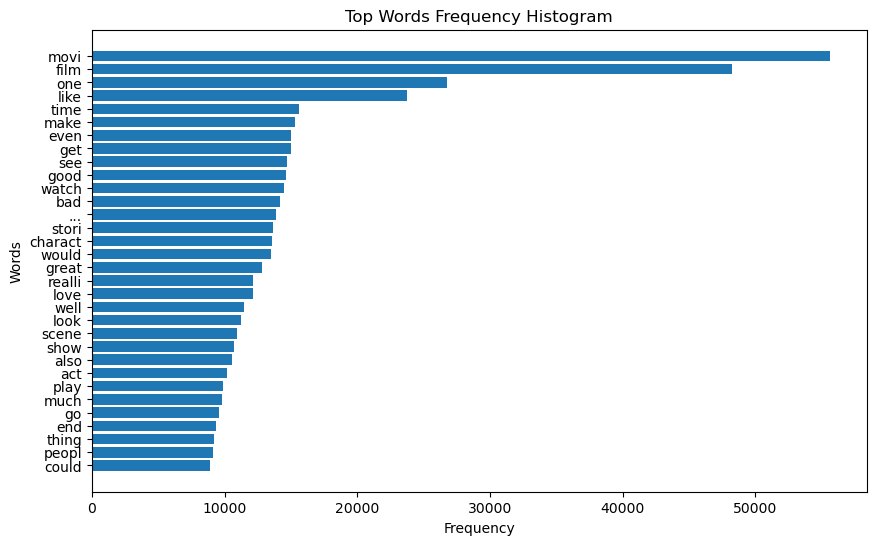

In [31]:
# Separate words and frequencies
words_sentiments, frequencies = zip(*top_words[:50])
words, sentiments = zip(*words_sentiments)

# Create a horizontal bar chart for the top words
plt.figure(figsize=(10, 6))
plt.barh(words, frequencies)
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top Words Frequency Histogram')
plt.gca().invert_yaxis()  
plt.show()




### Feature extraction

### TFIDF vectors

TF-IDF, which stands for Term Frequency-Inverse Document Frequency, is a technique used for text data preprocessing and feature extraction. It is widely used in natural language processing (NLP) and text mining tasks.

<img src="tfidf.png" alt="tfidf">

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(df['cleaned_review'])
X_tfidf

<49582x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 3622579 stored elements in Compressed Sparse Row format>

In [33]:

tfidf_vect=TfidfVectorizer(stop_words='english',ngram_range=(1,3))
train_tfidf=tfidf_vect.fit_transform(df['cleaned_review'].values.tolist())
train_tfidf.shape


(49582, 7456984)

In [34]:
## Outputs from the TF-IDF transformed data
print(train_tfidf)


  (0, 7057228)	0.05615574228590062
  (0, 6913068)	0.05615574228590062
  (0, 1280176)	0.05615574228590062
  (0, 608205)	0.05615574228590062
  (0, 4726025)	0.05615574228590062
  (0, 7169213)	0.05615574228590062
  (0, 2186289)	0.05615574228590062
  (0, 5118720)	0.05615574228590062
  (0, 6012012)	0.05615574228590062
  (0, 6323932)	0.05615574228590062
  (0, 3591473)	0.05615574228590062
  (0, 717162)	0.05615574228590062
  (0, 5118271)	0.05615574228590062
  (0, 6870936)	0.05615574228590062
  (0, 3308670)	0.05615574228590062
  (0, 1182060)	0.05615574228590062
  (0, 4198242)	0.05615574228590062
  (0, 4058180)	0.05615574228590062
  (0, 504738)	0.05615574228590062
  (0, 4676958)	0.05615574228590062
  (0, 3519020)	0.05615574228590062
  (0, 3836777)	0.05615574228590062
  (0, 3308548)	0.05615574228590062
  (0, 4526409)	0.05615574228590062
  (0, 6069361)	0.05615574228590062
  :	:
  (49581, 1043488)	0.03785030981497033
  (49581, 5670821)	0.04987241747607663
  (49581, 6843945)	0.0324293692821185
  (495

A coordinate or index pair (e.g., (0, 1646716)): This pair signifies a specific location or position within a data structure, such as a matrix, array, or sparse data representation.

A numerical value (e.g., 0.05388981955687548): This value is associated with the specified position in the data structure. 

## Part II Modeling

#### decomposition of the train and test sets


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(train_tfidf, df['sentiment'], test_size=0.2, random_state=42)

### Lgistic regression

In [91]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.85


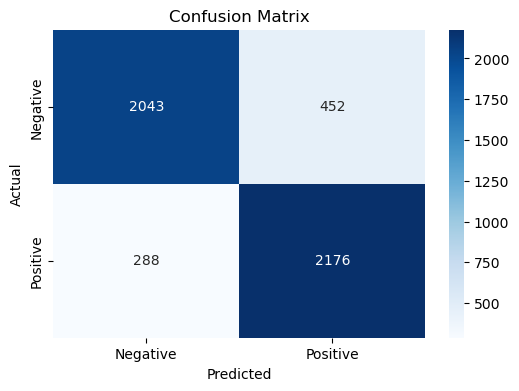

In [92]:
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### SVM (Support Vector Machine )

In [93]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df['sentiment'], test_size=0.2, random_state=10)


svm_model = SVC(kernel='linear', C=1.0)


svm_model.fit(X_train, y_train)


y_pred = svm_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f'SVM Model Accuracy: {accuracy:.2f}')


SVM Model Accuracy: 0.88


#### Gridsearch to otimize svm parameters

## ANN

ANN stands for Artificial Neural Network. It is a type of neural network which is modeled loosely after the human brain, that are designed to recognize patterns

#### ecoding target , applying svd on train_tfidf and split train test data

In [36]:
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import TruncatedSVD

#### applying svd to reduce dimension


In [37]:

train_tfidf = tfidf_vect.fit_transform(df['cleaned_review'].values.tolist())
X = train_tfidf  
y = df['sentiment']  


n_components = 100 
svd = TruncatedSVD(n_components=n_components)
X_reduced = svd.fit_transform(train_tfidf)

In [38]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [39]:

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y_encoded, test_size=0.1, random_state=1)

In [40]:
X_train 

array([[ 0.05634159,  0.0371153 , -0.00560685, ...,  0.0084484 ,
        -0.0027138 , -0.00600822],
       [ 0.07475797, -0.02720817, -0.01300055, ...,  0.015283  ,
         0.01815437,  0.00635251],
       [ 0.05634232, -0.00851683,  0.0081094 , ..., -0.00143031,
        -0.00796135,  0.00221343],
       ...,
       [ 0.06170758, -0.02671086,  0.02693263, ...,  0.00178466,
         0.01617036, -0.03073457],
       [ 0.05166969, -0.00672102, -0.01470276, ..., -0.01560452,
        -0.00368431, -0.00700569],
       [ 0.06625879, -0.00203434, -0.03196183, ...,  0.01807515,
         0.00993517, -0.00401654]])

##### ANN
Neural networks are a set of algorithms, modeled loosely after the human brain, that are designed to recognize patterns. Neural networks are made of perceptrons.

In Artificial neural network, we use multiple such perceptrons to learn different attributes of the dataset. Together, they can learn highly complex non linear structure from data.

<img src="ann.jpg" alt="ann">

In [87]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()
# Add an input layer that matches the shape of your features
model.add(Dense(64, input_shape=(input_shape,), activation='relu'))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization()) 

model.add(Dropout(0.5))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization()) 
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))


early_stopping = EarlyStopping(patience=2, restore_best_weights=True)

In [88]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_37 (Dense)            (None, 64)                6464      
                                                                 
 dense_38 (Dense)            (None, 128)               8320      
                                                                 
 batch_normalization_12 (Ba  (None, 128)               512       
 tchNormalization)                                               
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_39 (Dense)            (None, 64)                8256      
                                                                 
 batch_normalization_13 (Ba  (None, 64)                256       
 tchNormalization)                                   

In [89]:
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32, callbacks=[early_stopping])

Epoch 1/10
1395/1395 [==============================] - 3s 1ms/step - loss: 0.7169 - accuracy: 0.6502 - val_loss: 0.4047 - val_accuracy: 0.8223
Epoch 2/10
1395/1395 [==============================] - 2s 1ms/step - loss: 0.4588 - accuracy: 0.7984 - val_loss: 0.3477 - val_accuracy: 0.8514
Epoch 3/10
1395/1395 [==============================] - 2s 1ms/step - loss: 0.4049 - accuracy: 0.8243 - val_loss: 0.3384 - val_accuracy: 0.8548
Epoch 4/10
1395/1395 [==============================] - 2s 1ms/step - loss: 0.3781 - accuracy: 0.8359 - val_loss: 0.3316 - val_accuracy: 0.8594
Epoch 5/10
1395/1395 [==============================] - 2s 1ms/step - loss: 0.3720 - accuracy: 0.8412 - val_loss: 0.3274 - val_accuracy: 0.8609
Epoch 6/10
1395/1395 [==============================] - 2s 1ms/step - loss: 0.3619 - accuracy: 0.8461 - val_loss: 0.3269 - val_accuracy: 0.8609
Epoch 7/10
1395/1395 [==============================] - 2s 1ms/step - loss: 0.3571 - accuracy: 0.8466 - val_loss: 0.3263 - val_accuracy:

In [90]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy:.2f}')

155/155 [==============================] - 0s 599us/step - loss: 0.3222 - accuracy: 0.8596
Accuracy: 0.86
